# MLP

## EDA
* There're no missing values from this dataset
* All columns except target column (quality) are float numbers, target values are integer, which is exactly what we wanted 

In [1]:
import pandas as pd

df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [2]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

## Correlation

In [5]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


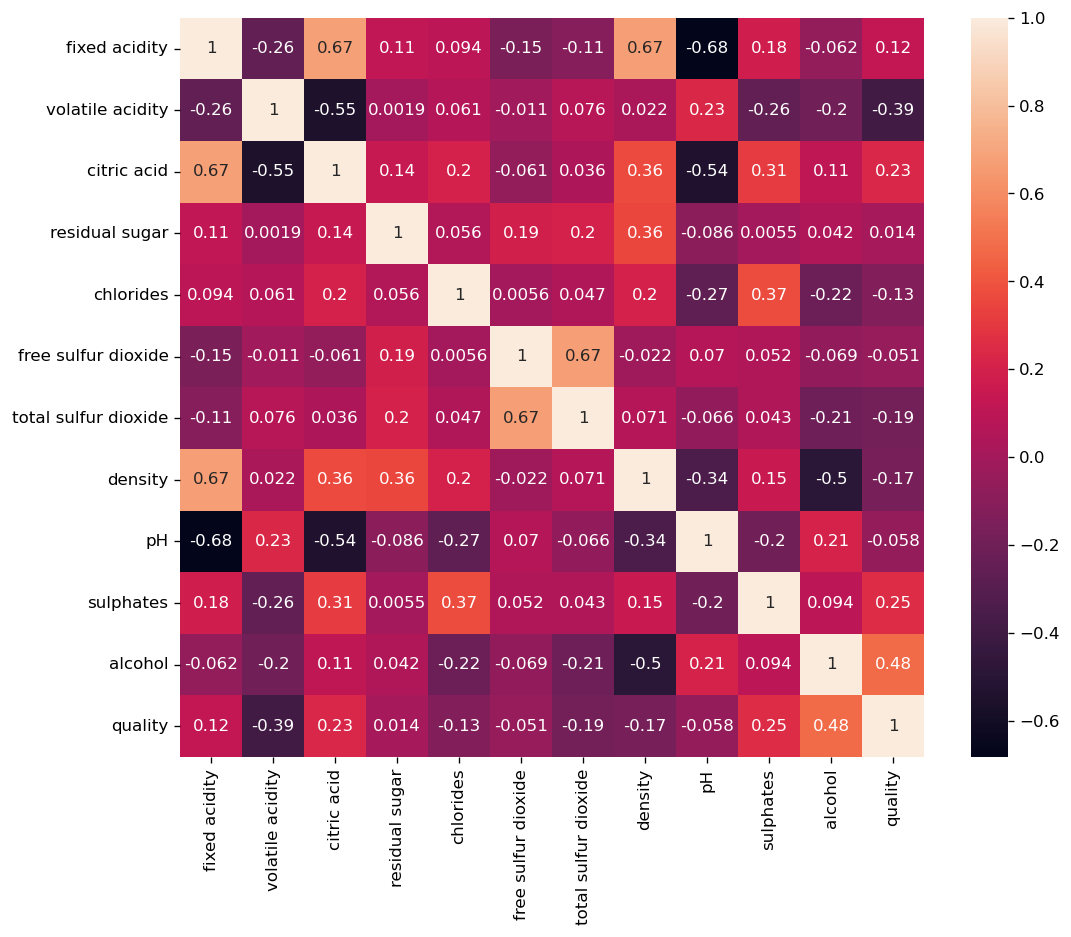

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8), dpi=120)
sns.heatmap(df.corr(), annot=True)
plt.show()

# Creating a basic MLP

## Split data into train/valid/test sets

In [7]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [8]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [9]:
Y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

train_x, ee_x, train_y, ee_y = train_test_split(X, Y, test_size=0.3, random_state=42)

In [11]:
train_x.shape

(1119, 11)

In [12]:
valid_x, test_x, valid_y, test_y = train_test_split(ee_x, ee_y, test_size=0.5, random_state=42)

In [13]:
valid_x.shape

(240, 11)

In [14]:
test_x.shape

(240, 11)

In [15]:
train_x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
925,8.6,0.220,0.36,1.9,0.064,53.0,77.0,0.99604,3.47,0.87,11.0
363,12.5,0.460,0.63,2.0,0.071,6.0,15.0,0.99880,2.99,0.87,10.2
906,7.2,0.540,0.27,2.6,0.084,12.0,78.0,0.99640,3.39,0.71,11.0
426,6.4,0.670,0.08,2.1,0.045,19.0,48.0,0.99490,3.49,0.49,11.4
1251,7.5,0.580,0.14,2.2,0.077,27.0,60.0,0.99630,3.28,0.59,9.8
...,...,...,...,...,...,...,...,...,...,...,...
1130,9.1,0.600,0.00,1.9,0.058,5.0,10.0,0.99770,3.18,0.63,10.4
1294,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9
860,7.2,0.620,0.06,2.7,0.077,15.0,85.0,0.99746,3.51,0.54,9.5
1459,7.9,0.200,0.35,1.7,0.054,7.0,15.0,0.99458,3.32,0.80,11.9


In [16]:
from sklearn.preprocessing import StandardScaler  # Or from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
scaler.fit(train_x)

train_x = scaler.transform(train_x)
valid_x = scaler.transform(valid_x)
test_x = scaler.transform(test_x)

train_x = pd.DataFrame(train_x, columns=df.columns[:-1])
valid_x = pd.DataFrame(valid_x, columns=df.columns[:-1])
test_x = pd.DataFrame(test_x, columns=df.columns[:-1])

In [17]:
import torch

train_x = torch.tensor(train_x.to_numpy(), dtype=torch.float)

In [18]:
train_x

tensor([[ 1.6954e-01, -1.7211e+00,  4.5930e-01,  ...,  1.0118e+00,
          1.2266e+00,  5.5006e-01],
        [ 2.4461e+00, -4.0196e-01,  1.8411e+00,  ..., -2.1069e+00,
          1.2266e+00, -2.0517e-01],
        [-6.4768e-01,  3.7747e-02, -1.2805e-03,  ...,  4.9203e-01,
          2.9727e-01,  5.5006e-01],
        ...,
        [-6.4768e-01,  4.7745e-01, -1.0760e+00,  ...,  1.2717e+00,
         -6.9015e-01, -8.6600e-01],
        [-2.3907e-01, -1.8310e+00,  4.0813e-01,  ...,  3.7218e-02,
          8.2003e-01,  1.3997e+00],
        [-1.4649e+00, -1.3363e+00, -5.2457e-02,  ...,  4.9203e-01,
         -6.9015e-01,  2.9102e+00]])

In [19]:
test_x = torch.tensor(test_x.to_numpy(), dtype=torch.float)
valid_x = torch.tensor(valid_x.to_numpy(), dtype=torch.float)

In [20]:
valid_x.shape

torch.Size([240, 11])

In [21]:
train_y = torch.tensor(train_y.to_numpy(), dtype=torch.float)
test_y = torch.tensor(test_y.to_numpy(), dtype=torch.float)
valid_y = torch.tensor(valid_y.to_numpy(), dtype=torch.float)

In [22]:
train_y

tensor([7., 5., 5.,  ..., 5., 7., 6.])

In [23]:
train_y.shape

torch.Size([1119])

In [24]:
from torch.utils.data import Dataset

class WineDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return len(self.x)

In [25]:
wine_train = WineDataset(train_x, train_y)

In [26]:
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset=wine_train, batch_size=8, shuffle=True)

In [27]:
wine_test = WineDataset(test_x, test_y)

In [28]:
test_loader = DataLoader(dataset=wine_test, batch_size=8)

In [29]:
class BasicMLP(torch.nn.Module):
    def __init__(self, n_inputs, n_hidden, n_outputs):
        super(BasicMLP, self).__init__()
        self.inputs = n_inputs
        self.hidden = n_hidden
        self.outputs = n_outputs
        
        self.linear1 = torch.nn.Linear(self.inputs, self.hidden)
        self.linear2 = torch.nn.Linear(self.hidden, self.outputs)

        self.relu = torch.nn.ReLU()

    def forward(self, X):
        out = self.linear1(X)
        out = self.relu(out)
        out = self.linear2(out)
        return out

In [30]:
model = BasicMLP(n_inputs=train_x.shape[1], n_hidden=5, n_outputs=1)

In [31]:
model

BasicMLP(
  (linear1): Linear(in_features=11, out_features=5, bias=True)
  (linear2): Linear(in_features=5, out_features=1, bias=True)
  (relu): ReLU()
)

In [32]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.0001, momentum=0.95)

In [33]:
# Training loop
epochs = 500

def training_func(model, optimizer, epochs):
    for epoch in range(epochs):
        model.train()
        batch_loss = []
        for features, targets in train_loader:
            outputs = model.forward(features)
            loss = criterion(outputs, targets)
            batch_loss.append(loss.item())
            optimizer.zero_grad() 
            loss.backward()
            optimizer.step()
            
        model.eval()
        train_loss.append(sum(batch_loss) / len(batch_loss))
        with torch.no_grad():
            predictions = model.forward(valid_x)
            loss = criterion(predictions, valid_y)
            valid_loss.append(loss.item())
        print(f'Training loss {train_loss[-1]}, validation loss {valid_loss[-1]}')

train_loss = []
valid_loss = []

training_func(model, optimizer, epochs)

model.eval()
test_loss = 0
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model.forward(inputs)
        test_loss += criterion(outputs, targets).item()

test_loss /= len(test_loader)
print(f'MSE: {test_loss}')

/Users/mingdama/miniconda3/envs/ml/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/mingdama/miniconda3/envs/ml/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([7])) that is different to the input size (torch.Size([7, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/mingdama/miniconda3/envs/ml/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([240])) that is different to the input size (torch.Size([240, 1])). This will likely lead to incorrect results due to broadcast

Training loss 19.465133924143654, validation loss 3.78085994720459
Training loss 1.3630852494921004, validation loss 0.8070576786994934
Training loss 0.7935725663389478, validation loss 0.68918377161026
Training loss 0.7322545840271881, validation loss 0.6572067141532898
Training loss 0.7046435508344855, validation loss 0.6324597001075745
Training loss 0.6932461276650429, validation loss 0.631005585193634
Training loss 0.6889821191983564, validation loss 0.6165040135383606
Training loss 0.6801100942705359, validation loss 0.6138653755187988
Training loss 0.6790107188480241, validation loss 0.6130863428115845
Training loss 0.6720569016677993, validation loss 0.6148619651794434
Training loss 0.6689408120300089, validation loss 0.6161827445030212
Training loss 0.6703909441828728, validation loss 0.6085657477378845
Training loss 0.6662560203245708, validation loss 0.613673746585846
Training loss 0.6690546192228795, validation loss 0.6138806343078613
Training loss 0.6690680352704865, valida

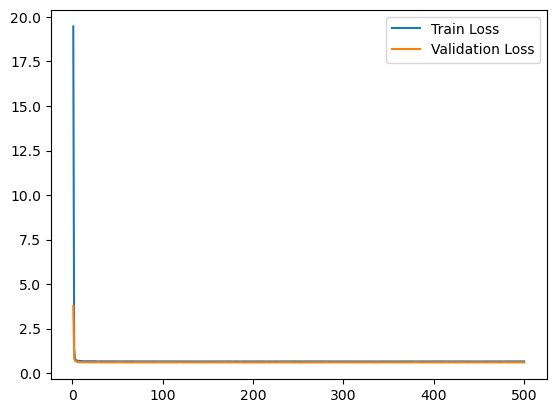

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# epochs vs. train && epochs vs. valid
def plot_loss_curves(epochs, train_loss, valid_loss):
    plt.plot(epochs, train_loss, label="Train Loss")
    plt.plot(epochs, valid_loss, label="Validation Loss")
    plt.legend()
    plt.show()

plot_loss_curves(np.linspace(1, epochs, epochs), train_loss, valid_loss)

# Making changes to basic MLP

## Normalized the data

## Add one more hidden layer to MLP model

In [35]:
class ImprovedMLP(torch.nn.Module):
    def __init__(self, n_inputs, n_hidden, n_outputs):
        super(ImprovedMLP, self).__init__()
        self.inputs = n_inputs
        self.hidden = n_hidden
        self.outputs = n_outputs
        
        self.linear1 = torch.nn.Linear(self.inputs, self.hidden)
        self.linear2 = torch.nn.Linear(self.hidden, self.hidden)
        self.linear3 = torch.nn.Linear(self.hidden, self.outputs)

        self.relu = torch.nn.ReLU()
        
    def forward(self, X):
        out = self.linear1(X)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.relu(out)
        out = self.linear3(out)
        return out

In [36]:
model = ImprovedMLP(n_inputs=train_x.shape[1], n_hidden=10, n_outputs=1)

In [37]:
model

ImprovedMLP(
  (linear1): Linear(in_features=11, out_features=10, bias=True)
  (linear2): Linear(in_features=10, out_features=10, bias=True)
  (linear3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [38]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.001, momentum=0.95)

In [39]:
train_loss = []
valid_loss = []
epochs = 500
training_func(model, optimizer, epochs)

model.eval()

model.eval()
test_loss = 0
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model.forward(inputs)
        test_loss += criterion(outputs, targets).item()

test_loss /= len(test_loader)
print(f'MSE: {test_loss}')

Training loss 4.6403649355684005, validation loss 0.6088521480560303
Training loss 0.6677955040974276, validation loss 0.6176981329917908
Training loss 0.6654114744492939, validation loss 0.604781448841095
Training loss 0.6594664824860437, validation loss 0.6010897755622864
Training loss 0.6619706260306495, validation loss 0.6038374304771423
Training loss 0.666705037014825, validation loss 0.606048583984375
Training loss 0.663636996277741, validation loss 0.6096721291542053
Training loss 0.6668554800961699, validation loss 0.5984923839569092
Training loss 0.6734052649566106, validation loss 0.6293280124664307
Training loss 0.667791416815349, validation loss 0.6045387983322144
Training loss 0.673575382200735, validation loss 0.6000627875328064
Training loss 0.6623874168310847, validation loss 0.5972395539283752
Training loss 0.6584615410438606, validation loss 0.6062784790992737
Training loss 0.6591951946062701, validation loss 0.6207697987556458
Training loss 0.6598854039396559, valida

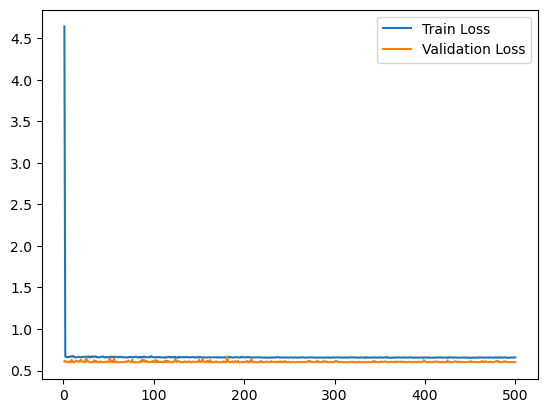

In [40]:
plot_loss_curves(np.linspace(1, epochs, epochs), train_loss, valid_loss)

# Optional: Implementing the MLP

In [41]:
# Add steps